In [10]:
import pandas as pd
import json
import urllib.request
import math
import sys
import requests
from pprint import pprint

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
url = "https://api.llama.fi/protocols"

In [33]:
# function to use requests.post to make an API call to the subgraph url
def run_GET(url):

    # endpoint where you are making the request
    request = requests.get(url)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.'.format(request.status_code))

In [7]:
result = run_GET(url)

In [11]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [8]:
result

[{'id': '2269',
  'name': 'Binance CEX',
  'address': None,
  'symbol': '-',
  'url': 'https://www.binance.com',
  'description': 'Binance is a cryptocurrency exchange which is the largest exchange in the world in terms of daily trading volume of cryptocurrencies',
  'chain': 'Multi-Chain',
  'logo': 'https://icons.llama.fi/binance-cex.jpg',
  'audits': '0',
  'audit_note': None,
  'gecko_id': None,
  'cmcId': None,
  'category': 'CEX',
  'chains': ['Ethereum', 'Binance', 'Tron', 'Bitcoin'],
  'module': 'binance/index.js',
  'twitter': 'binance',
  'forkedFrom': [],
  'oracles': [],
  'listedAt': 1668170565,
  'slug': 'binance-cex',
  'tvl': 76333981669.46788,
  'chainTvls': {'Binance': 21751512041.09032,
   'Ethereum': 27153004957.95191,
   'Tron': 14329068283.955675,
   'Bitcoin': 13100396386.46997},
  'change_1h': -14.152136864756415,
  'change_1d': -0.7005474251297699,
  'change_7d': 11.863185821163498,
  'tokenBreakdowns': {}},
 {'id': '182',
  'name': 'Lido',
  'address': '0x5a98

In [29]:
selected_keys = ['slug', 'name', 'chain','tvl', 'symbol', 'url', 'description']
# tmp = [{key: p[key]} for key in selected_keys for p in result]
tmp = [dict((k, p[k]) for k in selected_keys) for p in result]
df_p = pd.DataFrame(tmp).sort_values(by=['tvl'], ascending=False).iloc[:20]

In [30]:
df_p.head(50)

,slug,name,chain,tvl,symbol,url,description
0,binance-cex,Binance CEX,Multi-Chain,7.633398e+10,-,https://www.binance.com,Binance is a cryptocurrency exchange which is ...
1,lido,Lido,Multi-Chain,9.925772e+09,LDO,https://lido.fi/,"Liquidity for staked assets. Daily rewards, no..."
2,okx,OKX,Multi-Chain,8.572120e+09,-,https://www.okx.com,"OKX, formerly known as OKEx, is a Seychelles-b..."
3,polygon-bridge-&-staking,Polygon Bridge & Staking,Polygon,8.362129e+09,MATIC,https://polygon.technology/,Ethereum sidechain\r\n
4,bitfinex,Bitfinex,Multi-Chain,8.304004e+09,-,https://www.bitfinex.com,Bitfinex facilitates a graphical trading exper...
5,makerdao,MakerDAO,Ethereum,8.064118e+09,MKR,https://makerdao.com/,"Builders of Dai, a digital currency that can b..."
6,curve,Curve,Multi-Chain,4.199555e+09,CRV,https://curve.fi,Curve is a decentralized exchange liquidity po...
7,aave-v2,AAVE V2,Multi-Chain,4.181416e+09,AAVE,https://aave.com\r\n,Aave is an Open Source and Non-Custodial proto...
8,crypto-com,Crypto-com,Multi-Chain,3.867520e+09,-,https://crypto.com,The World Fastest Growing Crypto App.
9,wbtc,WBTC,Ethereum,3.778604e+09,WBTC,https://wbtc.network/,Wrapped Bitcoin (WBTC) is the first ERC20 toke...


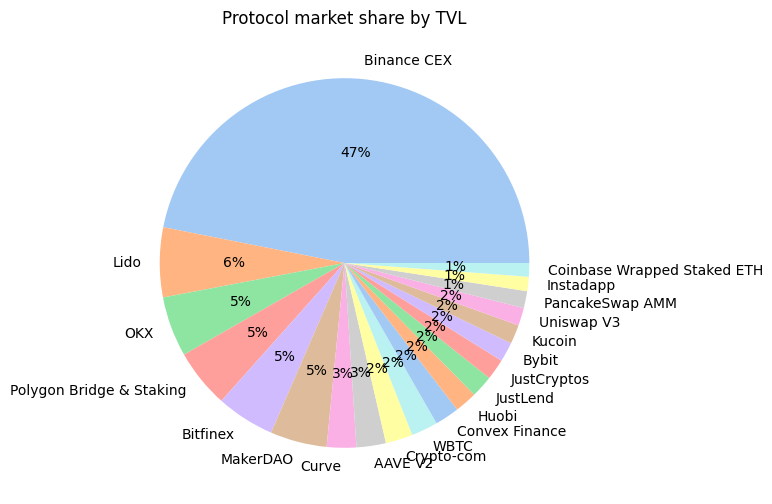

In [26]:
# Mostly cexes, so now is mainly a trading vehicle
fig,ax = plt.subplots(figsize=(12,6))
plt.title("Protocol market share by TVL")
plt.pie(df_p['tvl'], labels=df_p['name'], colors = sns.color_palette('pastel'), autopct="%.00f%%")
plt.show()

In [64]:
# Let's do a rough compare of uniswap v2 and v3 

def historical_tvl(slug):
    url = f"https://api.llama.fi/protocol/{slug}"
    print(f"url: {url}")
    result = run_GET(url)
#     print(result)
    selected_keys = ['id', 'name', 'symbol','chains', 'chainTvls', 'url', 'description']
    chain_dfs = {}
    tmp = dict((k, result[k]) for k in selected_keys)
    for c in tmp['chains']:
        print(f"chain: {c}")
#         print(tmp["chainTvls"][c])
        print(tmp["chainTvls"][c].keys())
        for k in tmp["chainTvls"][c].keys():
            stat = tmp["chainTvls"][c][k]
            if len(stat) == 0: continue
            df_c = pd.DataFrame(stat)
            df_c['date'] = pd.to_datetime(df_c['date'])
            df_c.set_index('date', inplace=True)
            chain_dfs[f"{c}_{k}"] = (df_c)
#     df_p = pd.DataFrame(tmp).sort_values(by=['tvl'], ascending=False).iloc[:20]
    return chain_dfs

In [61]:
uniswap_v3 = historical_tvl('uniswap-v3')

url: https://api.llama.fi/protocol/uniswap-v3
chain: Optimism
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Ethereum
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Polygon
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Celo
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Arbitrum
dict_keys(['tvl', 'tokensInUsd', 'tokens'])


In [65]:
uniswap_v2 = historical_tvl('uniswap-v2')

url: https://api.llama.fi/protocol/uniswap-v2
chain: Ethereum
dict_keys(['tvl', 'tokensInUsd', 'tokens'])


In [66]:
uniswap_v3

{'Optimism_tvl':                                totalLiquidityUSD
 date                                            
 1970-01-01 00:00:01.636761600       3.904444e+07
 1970-01-01 00:00:01.636848000       3.851921e+07
 1970-01-01 00:00:01.636934400       3.858285e+07
 1970-01-01 00:00:01.637020800       3.801042e+07
 1970-01-01 00:00:01.637107200       3.562659e+07
 1970-01-01 00:00:01.637193600       3.577852e+07
 1970-01-01 00:00:01.637280000       3.209014e+07
 1970-01-01 00:00:01.637366400       3.591005e+07
 1970-01-01 00:00:01.637452800       3.599116e+07
 1970-01-01 00:00:01.637539200       3.565814e+07
 1970-01-01 00:00:01.637625600       3.403319e+07
 1970-01-01 00:00:01.637712000       3.527698e+07
 1970-01-01 00:00:01.637798400       3.327429e+07
 1970-01-01 00:00:01.637884800       3.337538e+07
 1970-01-01 00:00:01.637971200       3.098395e+07
 1970-01-01 00:00:01.638057600       3.141664e+07
 1970-01-01 00:00:01.638144000       3.228167e+07
 1970-01-01 00:00:01.638230400    

In [67]:
# https://www.coingecko.com/en/categories/governance
# For top governance tokens
# https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&category=governance&order=market_cap_desc&per_page=100&page=1&sparkline=false